In [70]:
from random import sample
from pydub import AudioSegment
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as l
import librosa.display as l1
import scipy as sp
import math
import sklearn 
from IPython.display import Image
import csv
# libraries for Audio analysis: pyaudio and Essentia

In [33]:
Image(url= "pics/clssification_weld_image.jpg")

In [34]:
Image(url= "pics/cutting_area.jpg")

### Loading image

Duration 82.8


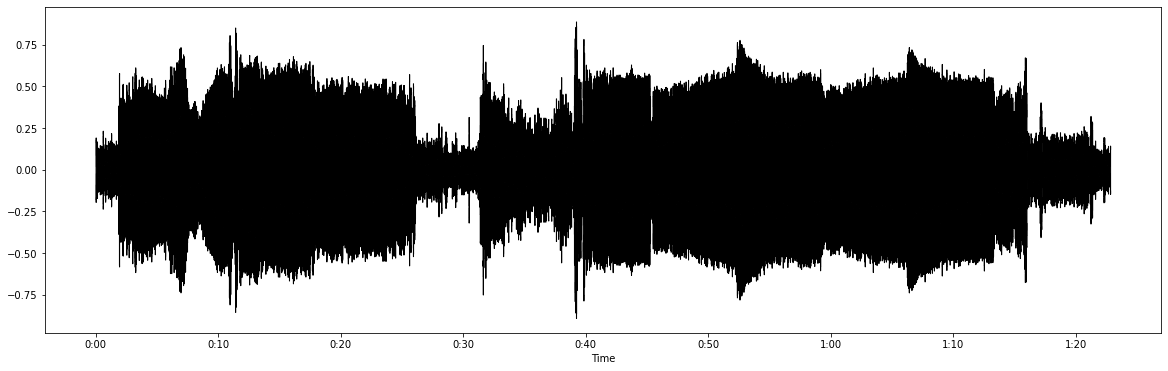

In [51]:
audio_data_00='Data/0_1_2021_06_17_090407_Sound_Pa_SF0000002,0000.wav'
duration=l.get_duration(filename='Data/0_1_2021_06_17_090407_Sound_Pa_SF0000002,0000.wav')
print("Duration",duration)
y0,sr0=l.load(audio_data_00)
plt.figure(figsize=(20,6))
l.display.waveshow(y0,color='black')

### Defining cutting area time 

In [45]:
# defining cutting area 
L_area_name=['I_1','II_1','buffer_L1','III_K','III','buffer_L2']
L_area=np.array([25,68,10,28,90,5]) # all dimensions in mm

M_area_name=['I_2','II_2','buffer_M1','IV_1_K','IV_1','buffer_M2','II_3_K',
            'II_3','buffer_M3','IV_2_K','IV_2','buffer_M4','II_4_K','II_4','buffer_M5','IV_3_K','buffer_M6','V','buffer_M7']
M_area=np.array([25,49,10,41,62,10,48,62,10,43,62,10,48,61,10,34,10,71,5]) # all dimensions in mm

feed_rate=16.667 #mm/sec 

In [4]:
L_time=[]
M_time=[]

In [39]:
# calculating time for each area 
L_time=np.round(L_area/feed_rate,2)
M_time=np.round(M_area/feed_rate,2)


print("Time of each section in L", L_time)
print("Time of each section in Meander", M_time)

Time of each section in L [1.5  4.08 0.6  1.68 5.4  0.3 ]
Time of each section in Meander [1.5  2.94 0.6  2.46 3.72 0.6  2.88 3.72 0.6  2.58 3.72 0.6  2.88 3.66
 0.6  2.04 0.6  4.26 0.3 ]


In [49]:
# displaying cutting area name, length and time
for i in range(len(L_area)):
    print(f'Area:{L_area_name[i]}, area length:{L_area[i]}, time taken to weld:{L_time[i]}')

L_start_time=12
print("Total time to weld L shape",sum(L_time))
print("Actual time to weld L shape from waveform",L_start_time+sum(L_time))

Area:I_1, area length:25, time taken to weld:1.5
Area:II_1, area length:68, time taken to weld:4.08
Area:buffer_L1, area length:10, time taken to weld:0.6
Area:III_K, area length:28, time taken to weld:1.68
Area:III, area length:90, time taken to weld:5.4
Area:buffer_L2, area length:5, time taken to weld:0.3
Total time to weld L shape 13.56
Actual time to weld L shape from waveform 25.560000000000002


In [50]:
for i in range(len(M_area)):
    print(f'Area:{M_area_name[i]}, area length:{M_area[i]}, time taken to weld:{M_time[i]}')

M_start_time=40
print("Total time to weld Meander shape",sum(M_time))
print("Actual time to weld meander shape from waveform",M_start_time+sum(M_time))

Area:I_2, area length:25, time taken to weld:1.5
Area:II_2, area length:49, time taken to weld:2.94
Area:buffer_M1, area length:10, time taken to weld:0.6
Area:IV_1_K, area length:41, time taken to weld:2.46
Area:IV_1, area length:62, time taken to weld:3.72
Area:buffer_M2, area length:10, time taken to weld:0.6
Area:II_3_K, area length:48, time taken to weld:2.88
Area:II_3, area length:62, time taken to weld:3.72
Area:buffer_M3, area length:10, time taken to weld:0.6
Area:IV_2_K, area length:43, time taken to weld:2.58
Area:IV_2, area length:62, time taken to weld:3.72
Area:buffer_M4, area length:10, time taken to weld:0.6
Area:II_4_K, area length:48, time taken to weld:2.88
Area:II_4, area length:61, time taken to weld:3.66
Area:buffer_M5, area length:10, time taken to weld:0.6
Area:IV_3_K, area length:34, time taken to weld:2.04
Area:buffer_M6, area length:10, time taken to weld:0.6
Area:V, area length:71, time taken to weld:4.26
Area:buffer_M7, area length:5, time taken to weld:0.3

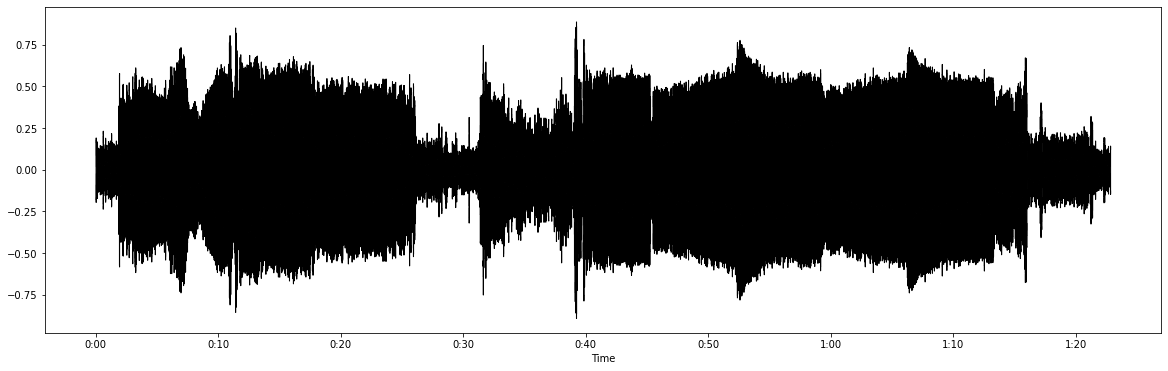

In [43]:
plt.figure(figsize=(20,6))
l.display.waveshow(y0,color='black')

### Splitting L shape sections 

In [87]:
newAudio_00 = AudioSegment.from_wav(audio_data_00)

def L_single_split(file,start_time,end_time,section,index):
    file = AudioSegment.from_wav(file)
    new_file = file[start_time:end_time]
    new_file.export('split_data/L_'+str(index)+'_'+str(section)+'.wav', format="wav")

def M_single_split(file,start_time,end_time,section,index):
    file = AudioSegment.from_wav(file)
    new_file = file[start_time:end_time]
    new_file.export('split_data/M_'+str(index)+'_'+str(section)+'.wav', format="wav")
# t1=12*1000
# t2=2*1000
# newAudio_00 = newAudio_00[t1:t2]
# newAudio_00.export('split_data/identify_start.wav', format="wav")

In [93]:
start=12*1000
audio_data_00='Data/0_1_2021_06_17_090407_Sound_Pa_SF0000002,0000.wav'
for index in range(len(L_area_name)):
    end=start+L_time[index]*1000
    L_single_split(audio_data_00,start,end,L_area_name[index],0)
    start=end

Duration 1.5
Duration 4.08
Duration 0.6
Duration 1.68
Duration 5.4
Duration 0.3


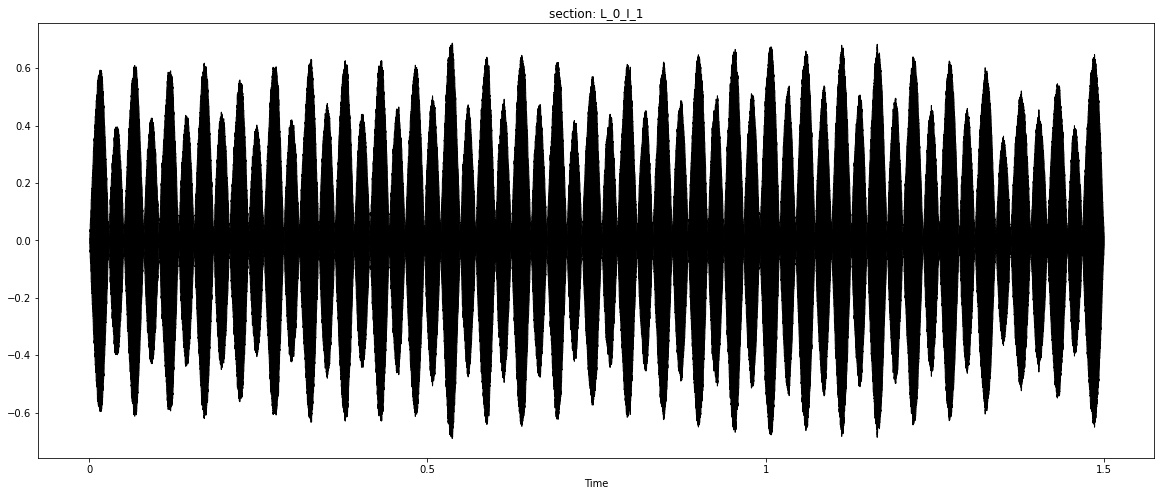

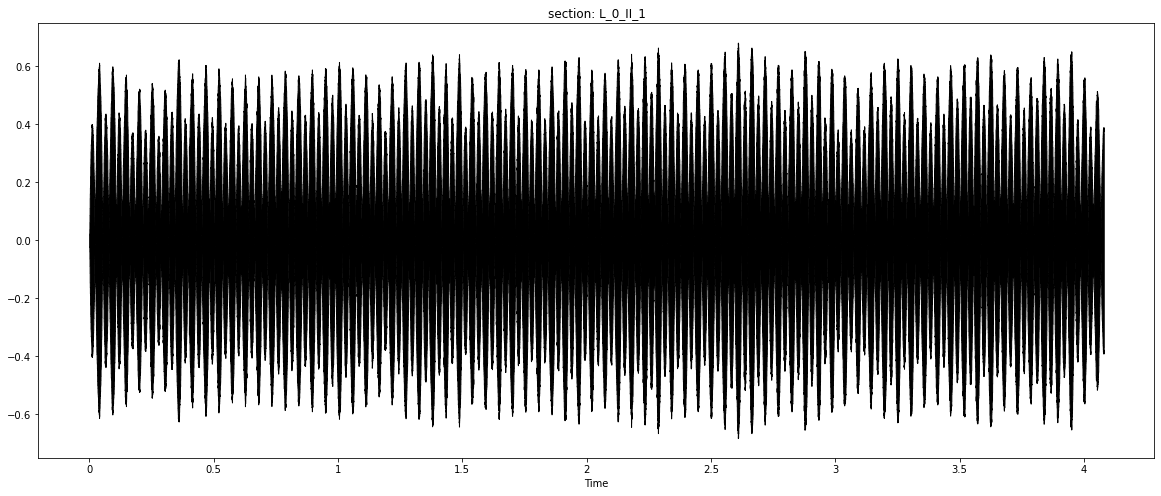

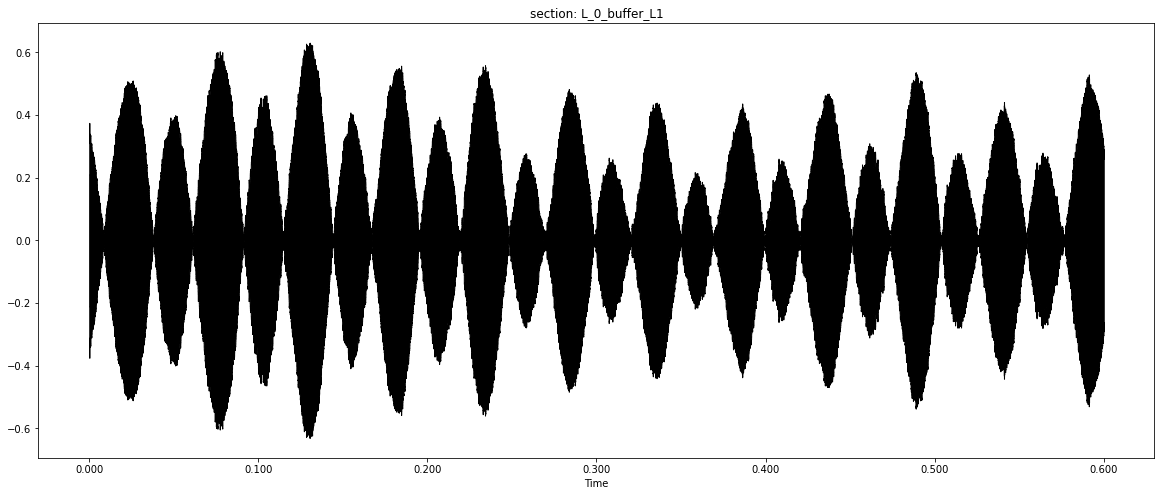

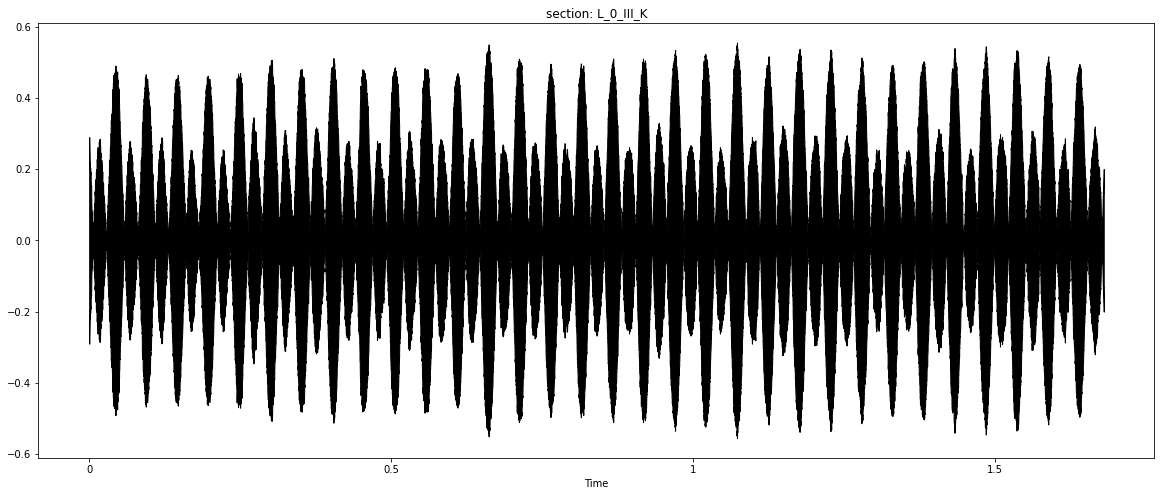

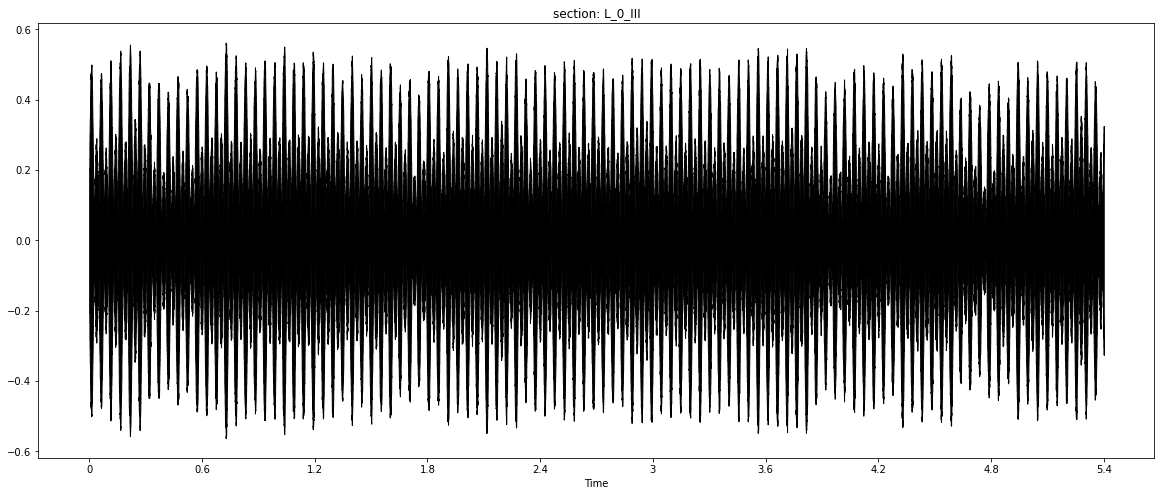

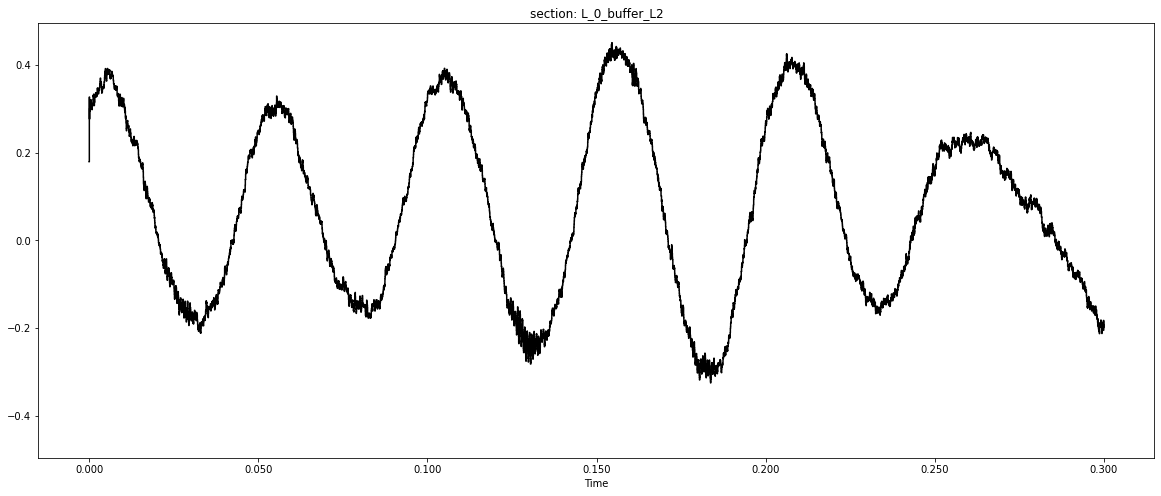

In [96]:
for i in range(len(L_area_name)):
    path='split_data/L_'+str(0)+'_'+str(L_area_name[i])+'.wav'
    duration=l.get_duration(filename=path)
    print("Duration",duration)
    y,sr=l.load(path)
    fig, axs = plt.subplots(figsize=(20,8),nrows=1, sharex=True)
    l.display.waveshow(y,color='black')
    axs.set(title="section: L_"+str(0)+'_'+str(L_area_name[i]))

In [97]:
start=40*1000
audio_data_00='Data/0_1_2021_06_17_090407_Sound_Pa_SF0000002,0000.wav'
for i in range(len(M_area_name)):
    end=start+M_time[i]*1000
    M_single_split(audio_data_00,start,end,M_area_name[i],0)
    start=end

Duration 1.5
Duration 2.94
Duration 0.6
Duration 2.46
Duration 3.72
Duration 0.6
Duration 2.88
Duration 3.72
Duration 0.6
Duration 2.58
Duration 3.72
Duration 0.6
Duration 2.88
Duration 3.66
Duration 0.6
Duration 2.04
Duration 0.6
Duration 4.26
Duration 0.3


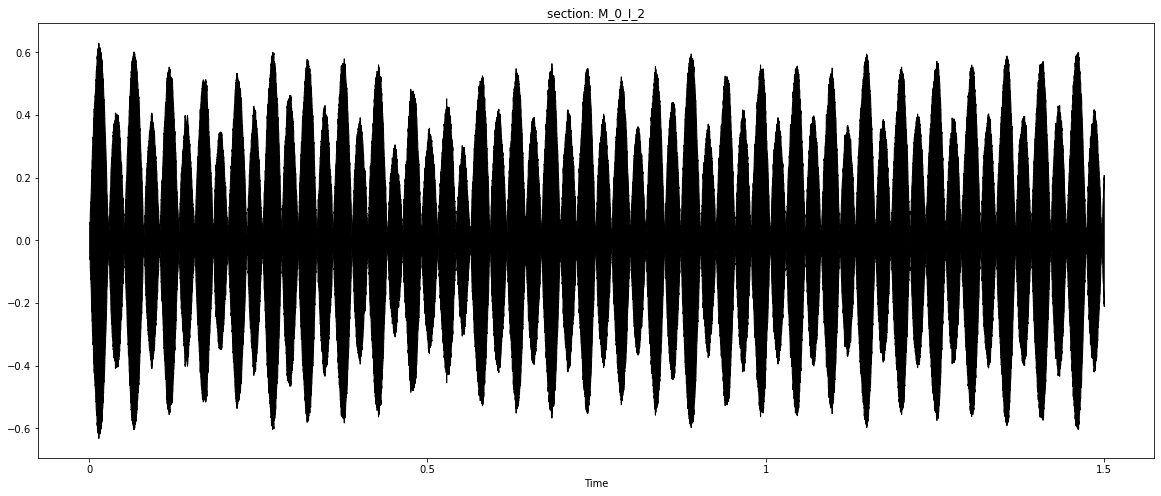

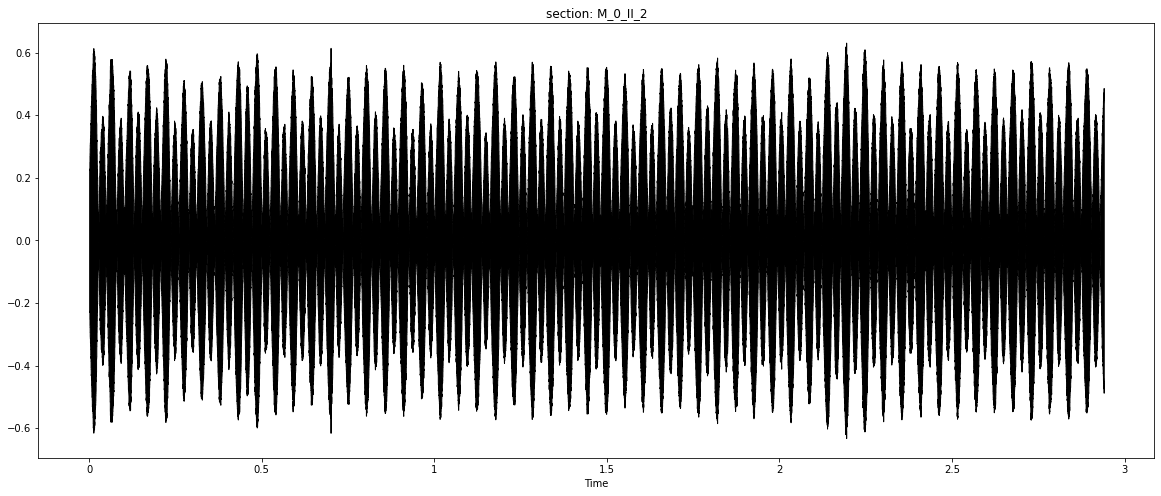

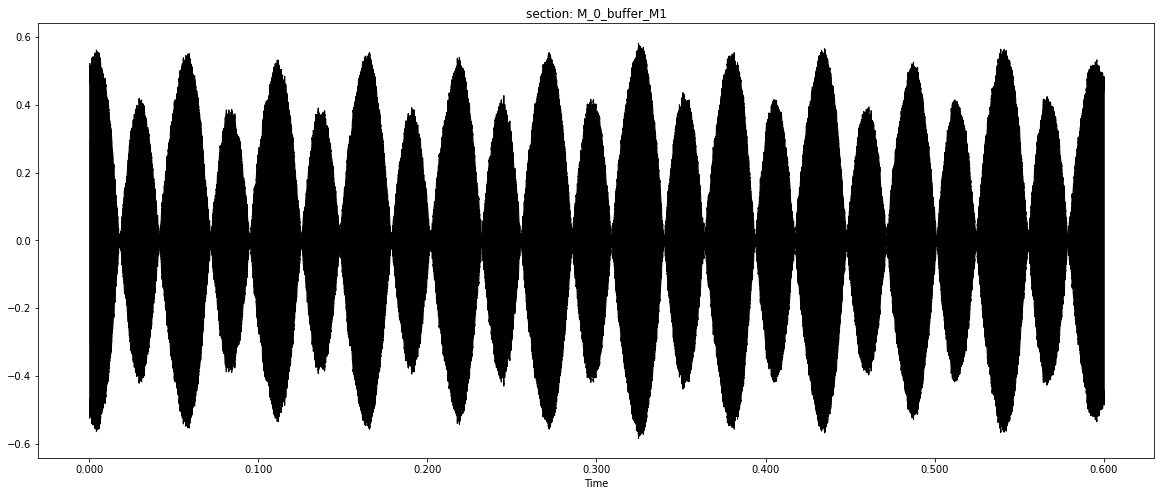

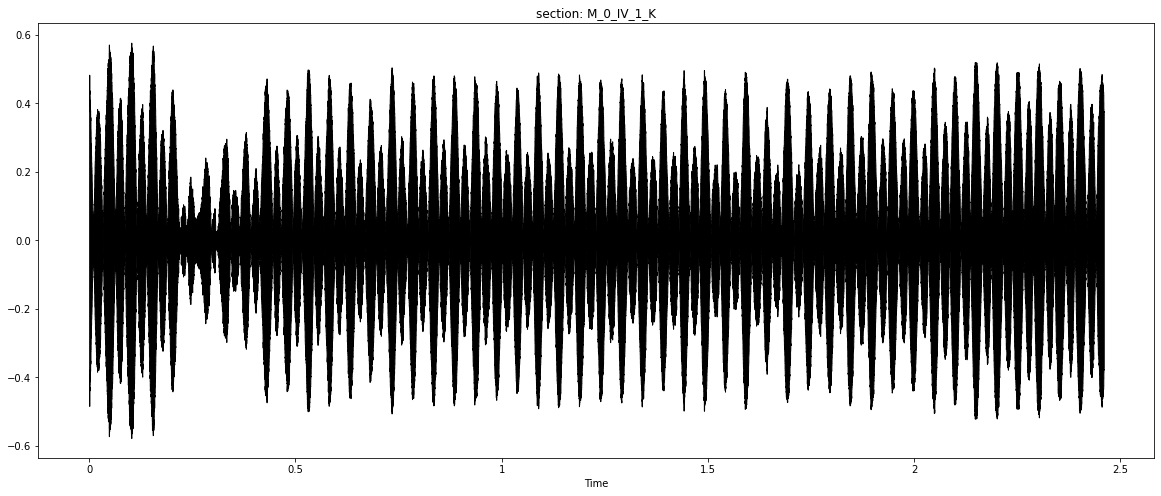

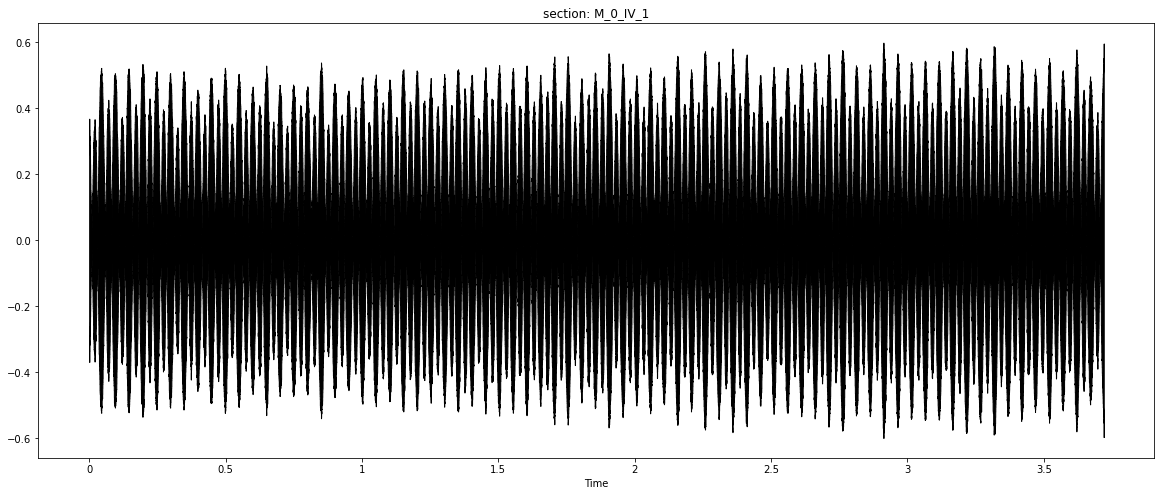

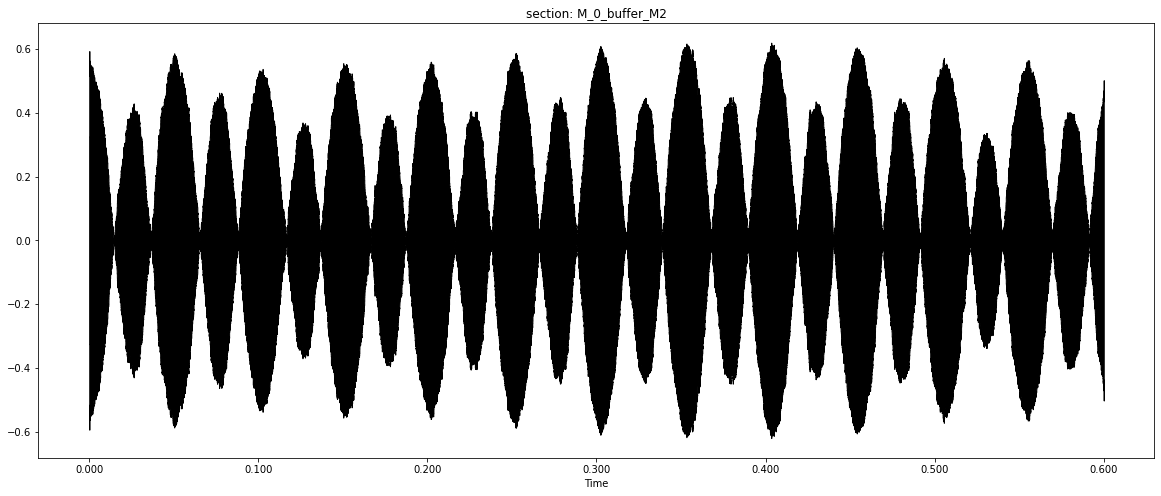

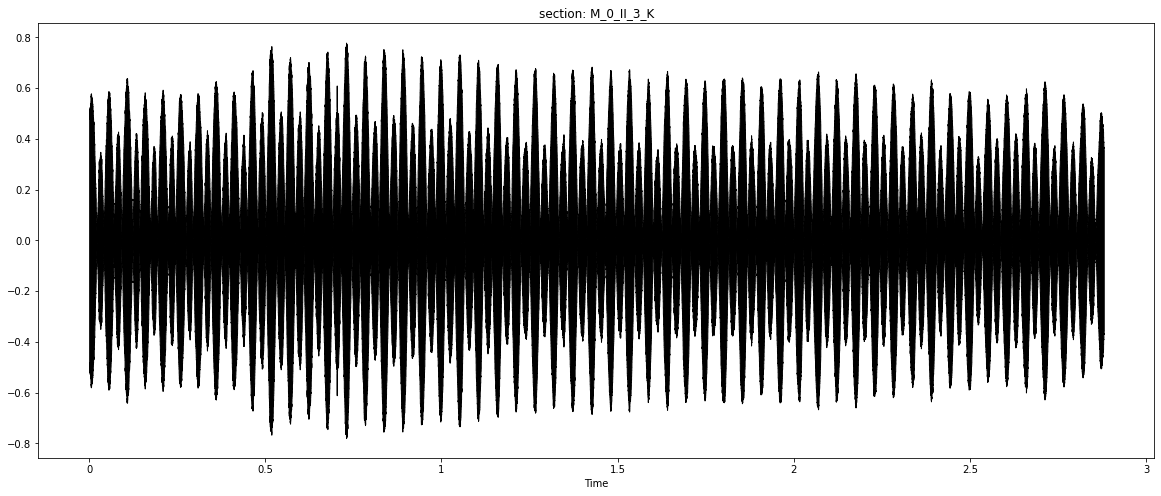

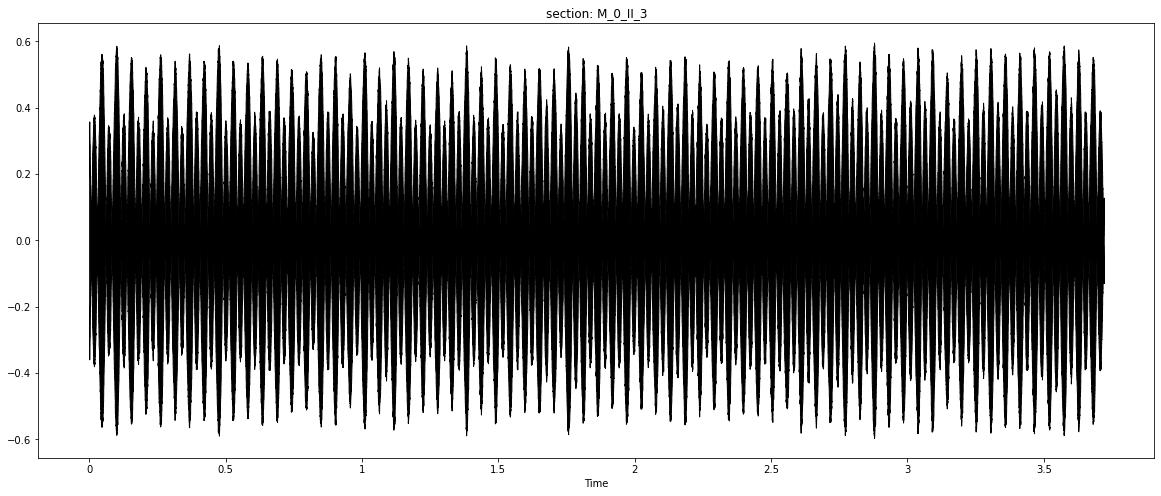

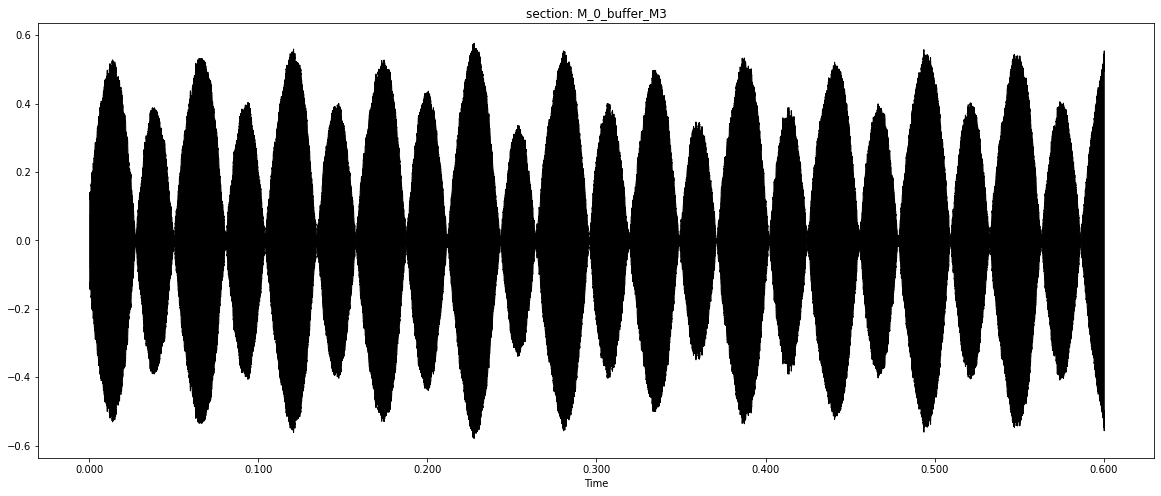

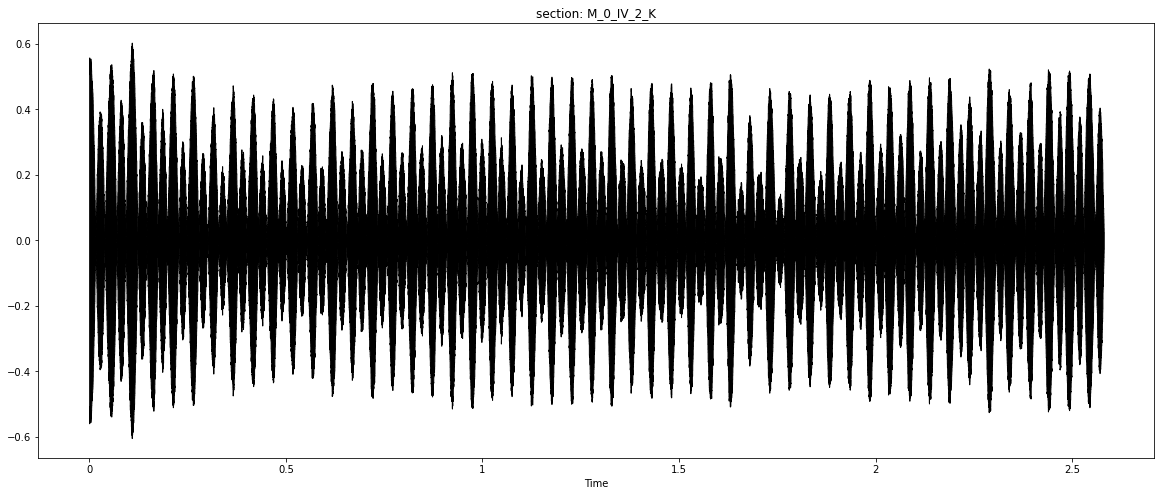

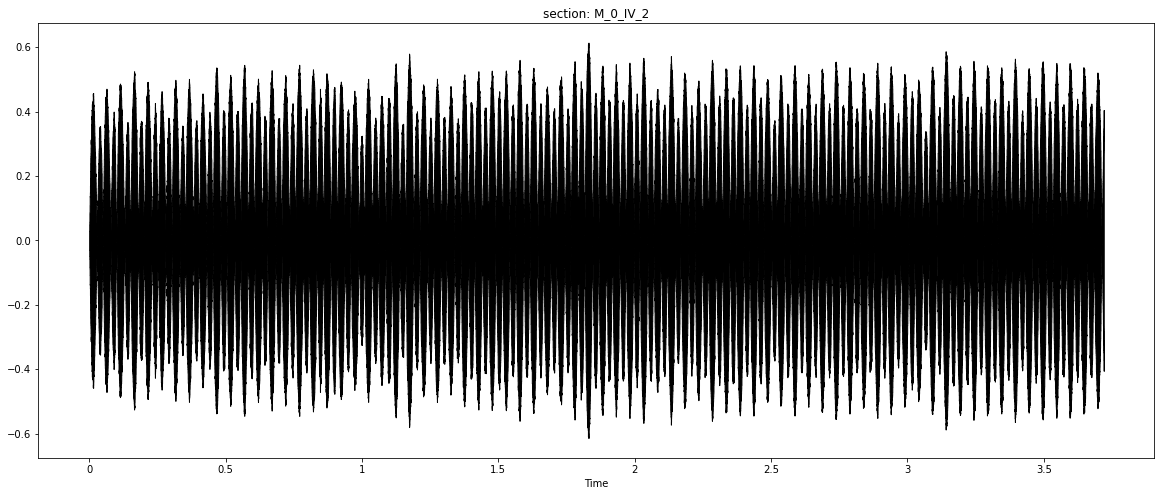

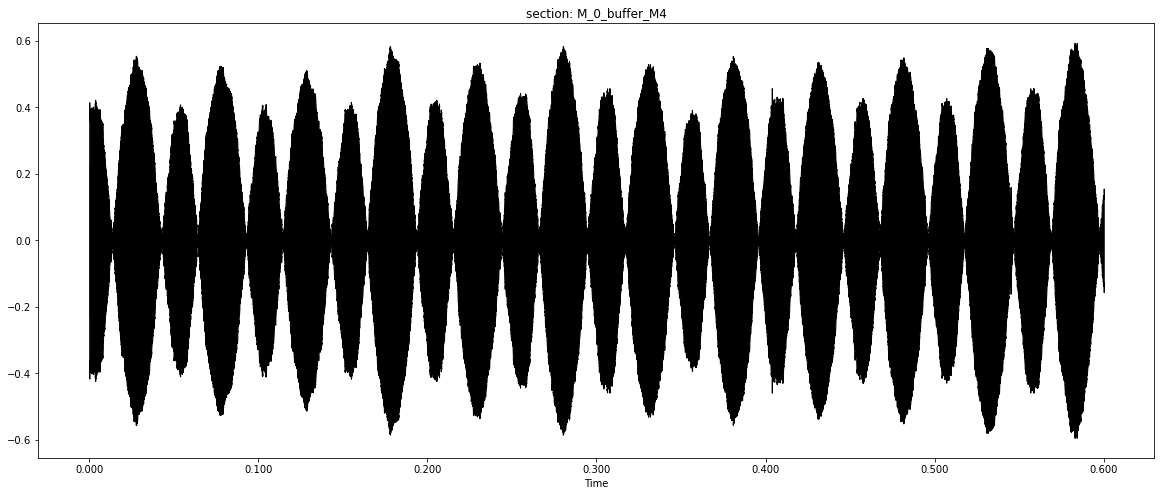

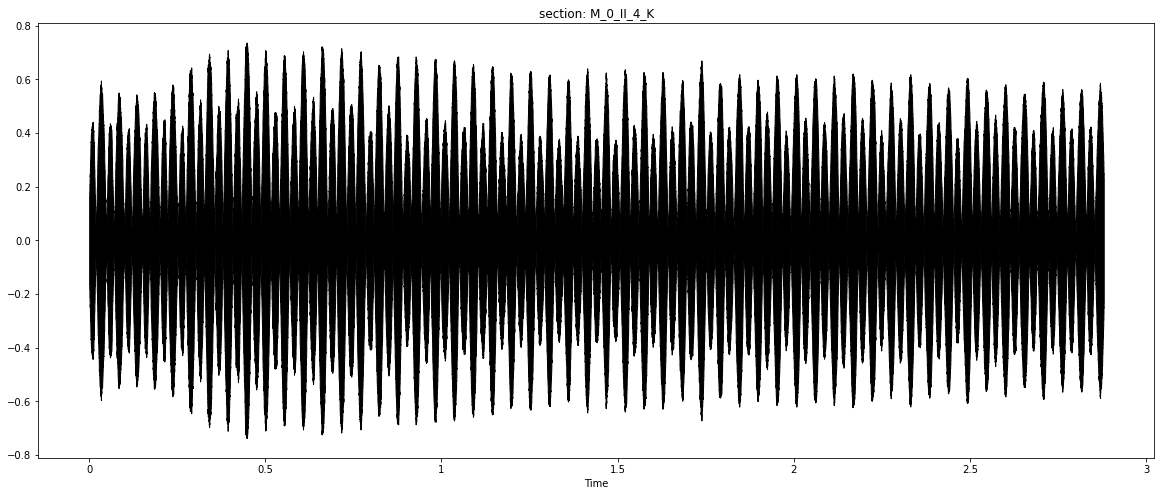

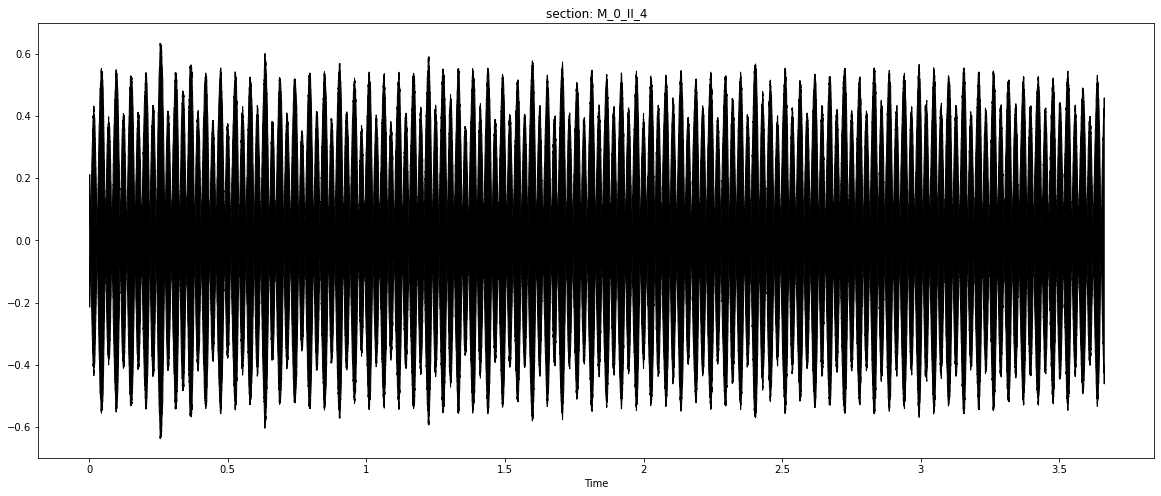

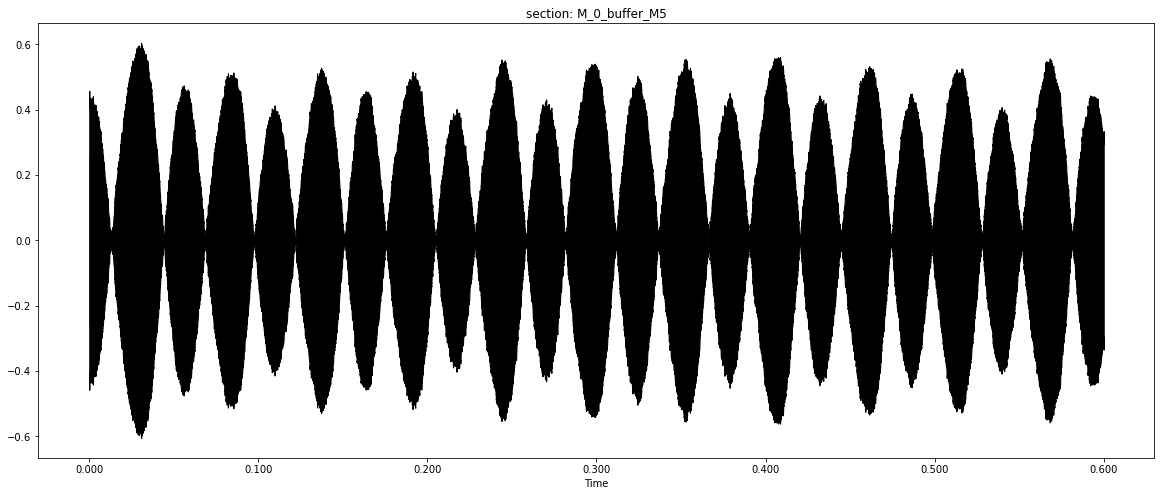

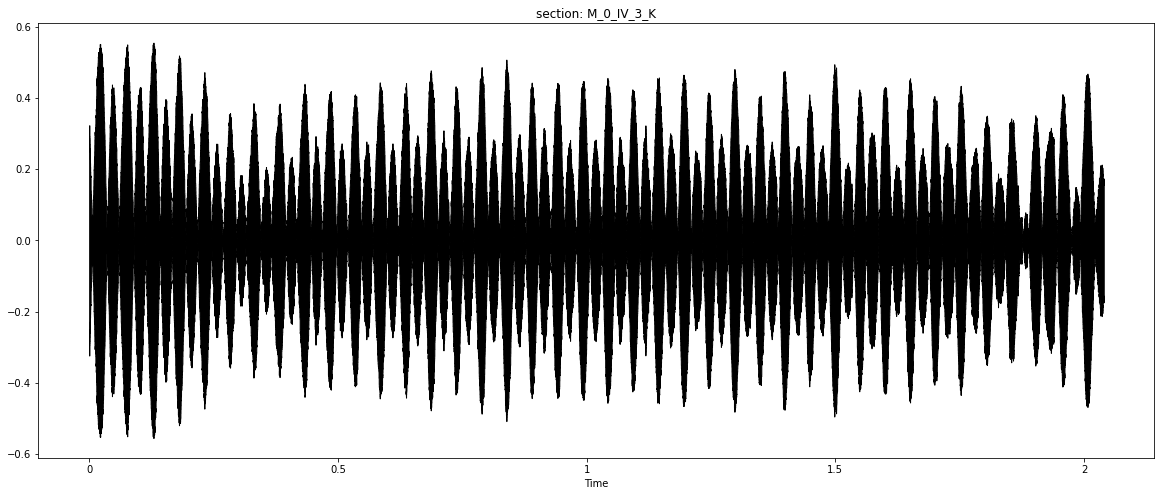

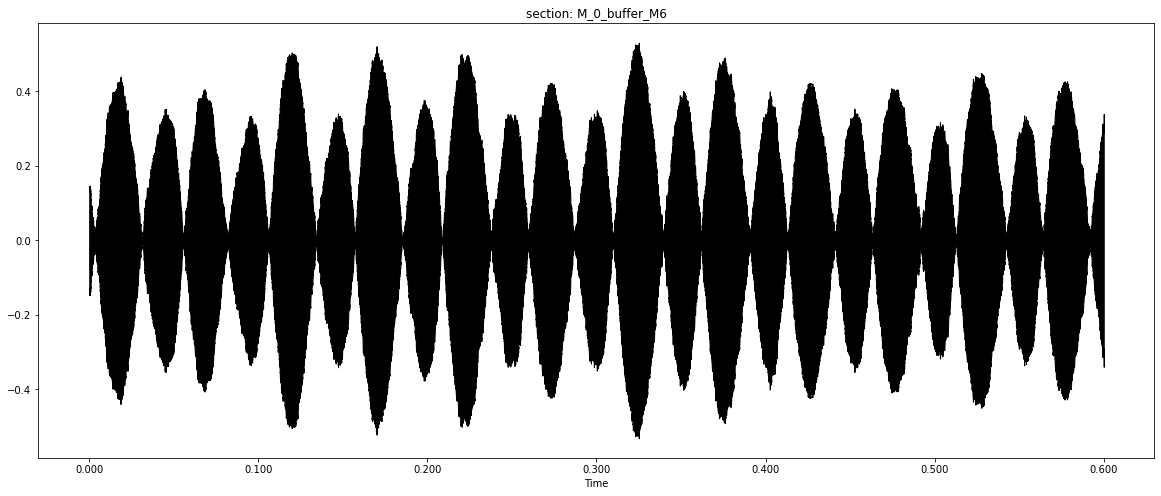

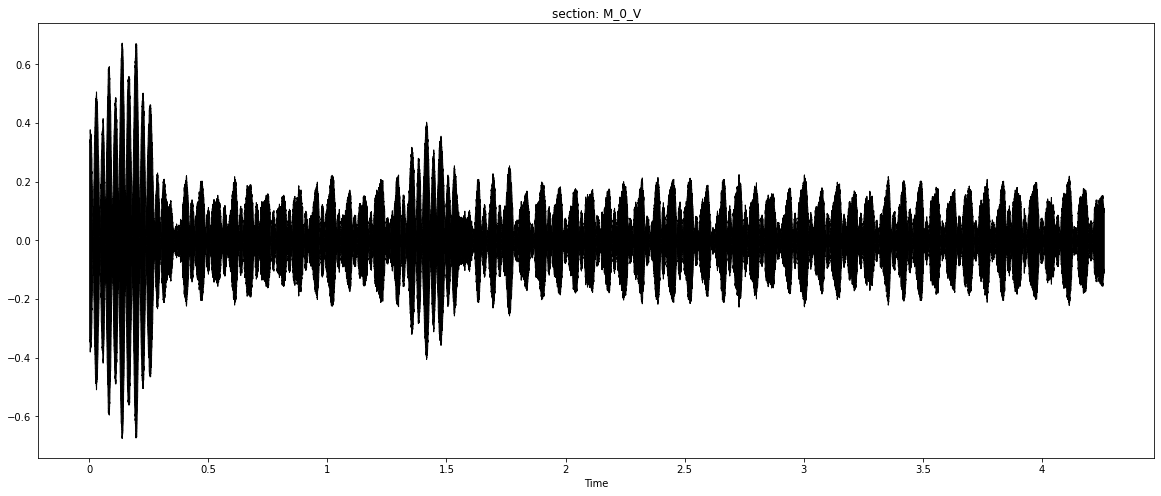

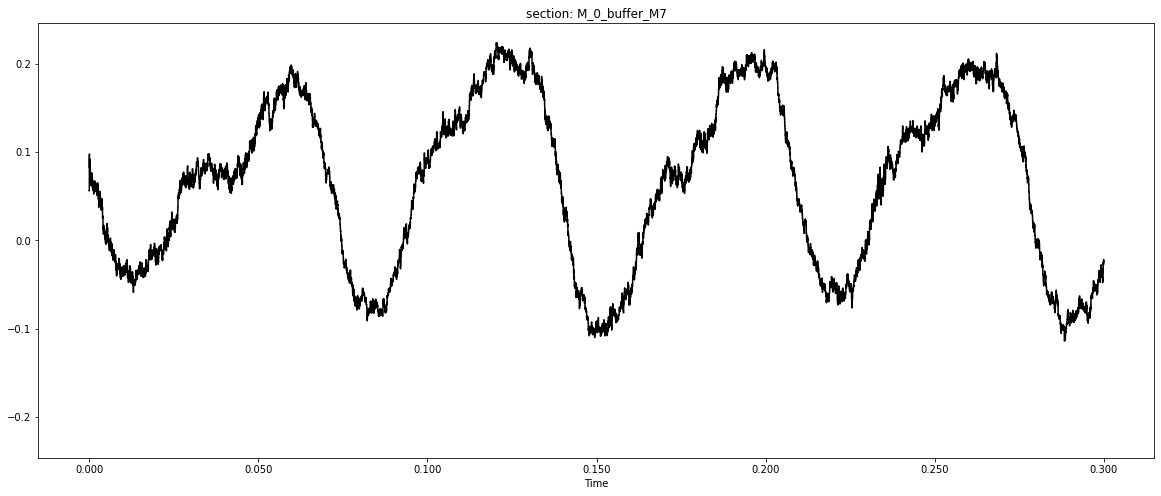

In [99]:
for i in range(len(M_area_name)):
    path='split_data/M_'+str(0)+'_'+str(M_area_name[i])+'.wav'
    duration=l.get_duration(filename=path)
    print("Duration",duration)
    y,sr=l.load(path)
    fig, axs = plt.subplots(figsize=(20,8),nrows=1, sharex=True)
    l.display.waveshow(y,color='black')
    axs.set(title="section: M_"+str(0)+'_'+str(M_area_name[i]))

In [100]:
def generic_features(audio_file):
    '''
    Extract Audio generic features using pydub
    Input: file path
    Output:  
    Channels: number of channels: 1 for mono, 2 for stereo audio
    Sample width: number of bytes per sample; 1 means 8 bits, 2 means 16 bit
    Frame rate/ sample rate: frequency of sample used (in hertz)
    Frame width: number of bytes for each frame. one fram e contains a sample of each channel
    length: audio file length in millisecond
    frame count: number of frames from sample
    Intensity: loudness in dBFS (dB relative to maximum possible loudness.)
    '''
    audio_segment = AudioSegment.from_file(audio_file)
    # Returns the loudness of the AudioSegment in dBFS (db relative to the maximum possible loudness). 
    #print("dBFS", audio_segment.dBFS)
    # Number of channels in this audio segment (1 means mono, 2 means stereo)
    # print("Channels", audio_segment.channels)
    # # Number of bytes in each sample (1 means 8 bit, 2 means 16 bit, etc)
    # print("sample_width (no of bytes each sample",audio_segment.sample_width)
    # # Frame_rate
    # print("Frame_rate", audio_segment.frame_rate)
    # # root mean square: A measure of loudness.
    # print("RMS",audio_segment.rms)
    # # Max: The highest amplitude of any sample in the AudioSegment.
    # print("Max", audio_segment.max)
    # # Max_amplitude: The highest amplitude of any sample in the AudioSegment
    # print("Max_amplitude", audio_segment.max_dBFS)
    # # duration in seconds
    # print("Duration", audio_segment.duration_seconds)
    # # frame_count: Returns the number of frames in the AudioSegment
    # print("Frame_count", audio_segment.frame_count())
    # # frame width
    # print("frame width", audio_segment.frame_width)
    # #length
    # print("len", len(audio_segment))
    l=[audio_segment.channels, audio_segment.sample_width, audio_segment.frame_rate,
        audio_segment.frame_width,int(len(audio_segment)/1000),audio_segment.frame_count(),audio_segment.dBFS]
    
    return l

In [101]:
def energy(signal):
    """Computes signal energy of frame"""
    return np.sum(signal ** 2) / np.float64(len(signal))

In [102]:
frame_size=1024
hop_length=512

In [107]:
combined_list_L=[]
col_names=['File_name','Channel','Sample_width','Frame_rate','Frame_width','Duration (ms)','Frame_count','Intensity',
            'Energy','Zero_crossing_rate','Root Mean Square','Spectral Centroid','Spectral Bandwidth', 'MFCC','Max_frequency','Min_frequency']


for file in L_area_name:
    file_path='split_data/L_0_'+file+'.wav'

    # file1=pd.read_csv('section_features.csv')
    # file1=file1.to_numpy()

    #finding features of L shape
    feature_list_L=generic_features(file_path)

    y,sr=l.load(file_path)
    feature_list_L.append(energy(y))
    
    zcr=l.feature.zero_crossing_rate(y=y,frame_length=frame_size,hop_length=hop_length)[0]
    feature_list_L.append(np.mean(zcr))
    
    rms=l.feature.rms(y=y,frame_length=frame_size,hop_length=hop_length)[0]
    feature_list_L.append(np.mean(rms))
    
    sc=l.feature.spectral_centroid(y=y, sr=sr,n_fft=frame_size,hop_length=hop_length)[0]
    feature_list_L.append(np.mean(sc))

    sb=l.feature.spectral_bandwidth(y=y, sr=sr,n_fft=frame_size,hop_length=hop_length)[0] 
    feature_list_L.append(np.mean(sb))

    mfcc=l.feature.mfcc(y=y,sr=sr)
    feature_list_L.append(np.mean(mfcc))

    max_frequency=max(y)
    # print(max_frequency)
    feature_list_L.append(max_frequency)

    min_frequency=min(y)
    # print(min_frequency)
    feature_list_L.append(min_frequency)

    file_name='L_0_'+file
    feature_list_L.insert(0,file_name)
    combined_list_L.append(feature_list_L)

In [108]:
print(len(combined_list_L),combined_list_L)


6 [['L_0_I_1', 1, 2, 100000, 2, 1, 150000.0, -8.395153042398514, 0.1465625885770975, 0.0025540865384615385, 0.3793678, 484.6589238965552, 1513.363694462826, 1.5979594, 0.68896043, -0.54009855], ['L_0_II_1', 1, 2, 100000, 2, 4, 408000.0, -8.782016349325183, 0.1340658659297052, 0.002774325284090909, 0.364192, 510.2798052591979, 1577.638862414298, 1.005977, 0.6818746, -0.52594066], ['L_0_buffer_L1', 1, 2, 100000, 2, 0, 60000.0, -10.629260259890565, 0.08761824119838908, 0.0048828125, 0.2863458, 677.7766015939035, 1758.1772366011255, 1.1771538, 0.63047403, -0.46281353], ['L_0_III_K', 1, 2, 100000, 2, 1, 168000.0, -11.0322980851514, 0.0798551005223518, 0.0038928724315068493, 0.2795487, 627.4168122686024, 1724.1465380340242, 1.4594951, 0.55521417, -0.34568828], ['L_0_III', 1, 2, 100000, 2, 5, 540000.0, -11.273508537559856, 0.075528657643613, 0.004086473980686695, 0.27315646, 649.8186758280112, 1716.6375994855941, 1.5201005, 0.56242144, -0.3538902], ['L_0_buffer_L2', 1, 2, 100000, 2, 0, 30000.

In [109]:
with open('CSV/section_feature.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(col_names)
    writer.writerows(combined_list_L)

In [110]:
combined_list_M=[]
for file in M_area_name:
    file_path='split_data/M_0_'+file+'.wav'

    # file1=pd.read_csv('section_features.csv')
    # file1=file1.to_numpy()

    #finding features of L shape
    feature_list_M=generic_features(file_path)

    y,sr=l.load(file_path)
    feature_list_M.append(energy(y))
    
    zcr=l.feature.zero_crossing_rate(y=y,frame_length=frame_size,hop_length=hop_length)[0]
    feature_list_M.append(np.mean(zcr))
    
    rms=l.feature.rms(y=y,frame_length=frame_size,hop_length=hop_length)[0]
    feature_list_M.append(np.mean(rms))
    
    sc=l.feature.spectral_centroid(y=y, sr=sr,n_fft=frame_size,hop_length=hop_length)[0]
    feature_list_M.append(np.mean(sc))

    sb=l.feature.spectral_bandwidth(y=y, sr=sr,n_fft=frame_size,hop_length=hop_length)[0] 
    feature_list_M.append(np.mean(sb))

    mfcc=l.feature.mfcc(y=y,sr=sr)
    feature_list_M.append(np.mean(mfcc))

    max_frequency=max(y)
    # print(max_frequency)
    feature_list_M.append(max_frequency)

    min_frequency=min(y)
    # print(min_frequency)
    feature_list_M.append(min_frequency)

    file_name='M_0_'+file
    feature_list_M.insert(0,file_name)
    combined_list_M.append(feature_list_M)

In [112]:
with open('CSV/section_feature.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(col_names)
    writer.writerows(combined_list_L)
    writer.writerows(combined_list_M)